# Can you predict the strength of concrete?

## 📖 Background
You work in the civil engineering department of a major university. You are part of a project testing the strength of concrete samples. 

Concrete is the most widely used building material in the world. It is a mix of cement and water with gravel and sand. It can also include other materials like fly ash, blast furnace slag, and additives. 

The compressive strength of concrete is a function of components and age, so your team is testing different combinations of ingredients at different time intervals. 

The project leader asked you to find a simple way to estimate strength so that students can predict how a particular sample is expected to perform.

## 💾 The data
The team has already tested more than a thousand samples ([source](https://archive.ics.uci.edu/ml/datasets/concrete+compressive+strength)):

#### Compressive strength data:
- "cement" - Portland cement in kg/m3
- "slag" - Blast furnace slag in kg/m3
- "fly_ash" - Fly ash in kg/m3
- "water" - Water in liters/m3
- "superplasticizer" - Superplasticizer additive in kg/m3
- "coarse_aggregate" - Coarse aggregate (gravel) in kg/m3
- "fine_aggregate" - Fine aggregate (sand) in kg/m3
- "age" - Age of the sample in days
- "strength" - Concrete compressive strength in megapascals (MPa)

***Acknowledgments**: I-Cheng Yeh, "Modeling of strength of high-performance concrete using artificial neural networks," Cement and Concrete Research, Vol. 28, No. 12, pp. 1797-1808 (1998)*.

## 💪 Challenge
Provide your project leader with a formula that estimates the compressive strength. Include:

1. The average strength of the concrete samples at 1, 7, 14, and 28 days of age.
2. The coefficients $\beta_{0}$, $\beta_{1}$ ... $\beta_{8}$, to use in the following formula:

$$ Concrete \ Strength = \beta_{0} \ + \ \beta_{1}*cement \ + \ \beta_{2}*slag \ + \ \beta_{3}*fly \ ash  \ + \ \beta_{4}*water \ + $$ 
$$ \beta_{5}*superplasticizer \ + \ \beta_{6}*coarse \ aggregate \ + \ \beta_{7}*fine \ aggregate \ + \ \beta_{8}*age $$

## ⌛️ Time is ticking. Good luck!

In [1]:
#necessary lib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#model
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

import math
#metric
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [2]:
data=pd.read_csv('/content/concrete_data.csv')
data1 = data[data['age']<=28]

In [3]:
age_1 =data1[data1['age']==1]
age_7 =data1[data1['age']==7]
age_14 =data1[data1['age']==14]
age_28 =data1[data['age']==28]
#The average strength of the concrete samples at 1, 7, 14, and 28 days of age
print("age_1: \n" ,age_1['strength'].mean())
print("age_7: \n" ,age_7['strength'].mean())
print("age_14: \n," ,age_14['strength'].mean())
print("age_28: \n" ,age_28['strength'].mean())


age_1: 
 9.452715959999999
age_7: 
 26.050623361474695
age_14: 
, 28.751037994193556
age_28: 
 36.748480284084714


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


In [4]:
data2 = data1[data1['age']>1]
data2 = data2.astype(int)
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 747 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   cement            747 non-null    int64
 1   slag              747 non-null    int64
 2   fly_ash           747 non-null    int64
 3   water             747 non-null    int64
 4   superplasticizer  747 non-null    int64
 5   coarse_aggregate  747 non-null    int64
 6   fine_aggregate    747 non-null    int64
 7   age               747 non-null    int64
 8   strength          747 non-null    int64
dtypes: int64(9)
memory usage: 58.4 KB


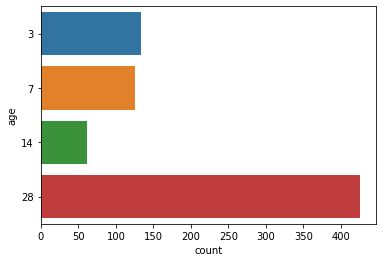

In [5]:
sns.countplot(data=data2,y='age')

In [6]:
#Create X and y for trainning
X= data2.drop('strength',axis=1)
y = data2['strength']

In [7]:
# resampling X, y
res = RandomOverSampler(random_state=42)
X_res,y_res = res.fit_resample(X,y)

In [8]:
#build model
linear = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.33, random_state=42)
reg = linear.fit(X_train,y_train)
y_pred = reg.predict(X_test)
#reuslt of model
print("Coefficients: \n", (reg.coef_))
print("Intercept: \n" , (reg.intercept_))

Coefficients: 
 [ 0.14391327  0.11903349  0.08142175 -0.25206443 -0.28326932  0.0238476
  0.02091689  0.91772642]
Intercept: 
 -29.56813921169232


In [9]:
#check metric model
print("MSE_score: \n",mean_squared_error(y_test, y_pred))
print("RMSE_score: \n",math.sqrt(mean_squared_error(y_test, y_pred)))
print("R2_score: \n",r2_score(y_test, y_pred)) 
print("MAE_score: \n",mean_absolute_error(y_test, y_pred))

MSE_score: 
 66.49302047693442
RMSE_score: 
 8.154325261904532
R2_score: 
 0.8604575424582905
MAE_score: 
 6.469977532175599


Concrete Strength = 
1. -29.5  
2. 0.14 * cement 
3.  0.11 * slag 
4.  0.08 * fly ash 
5. -0.25 * water 
6. -0.28 * superplasticizer + 
7. 0.02 * coarse aggregate 
8. +0.9 * age



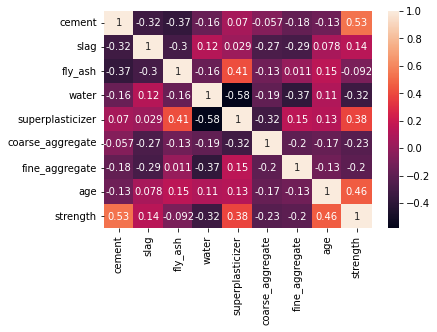

In [10]:
sns.heatmap(data1.corr(),annot=True)